## Introduction

This project focuses on predicting the selling price of used cars using machine learning regression techniques. The dataset consists of 8,128 car records with features such as year, kilometers driven, fuel type, transmission, engine specs, and ownership details. The goal is to build an accurate model that helps estimate a car’s market value based on its key attributes.

In [2]:
#importing necessary
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings as warning
warning.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r'C:\Users\usman\Downloads\Car details v3.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Analyzing the data

In [5]:
data.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
data.max_power.value_counts()  

max_power
74 bhp       377
81.80 bhp    220
88.5 bhp     204
67 bhp       165
46.3 bhp     162
            ... 
80.9 bhp       1
58.3 bhp       1
272 bhp        1
203 bhp        1
135.1 bhp      1
Name: count, Length: 322, dtype: int64

In [8]:
data.seats.value_counts()   #we will use mode 

seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [9]:
data.describe(include="all")  #descriptive analysis

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [10]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Data Cleaning and Feature Engineering

In [12]:
# Conversion of Mixed Data Types into Numerical Format
cols_to_clean = ['mileage', 'engine', 'max_power', 'torque']

for col in cols_to_clean:
    # Extract only numeric part (integer or decimal)
    data[col] = data[col].astype(str).str.extract(r'(\d+\.?\d*)')
    # Convert to numeric type
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Example: fill NaNs with mean for each column
for col in cols_to_clean:
    data[col].fillna(data[col].mean(),inplace=True)

In [13]:
data["seats"].fillna(data["seats"].mode()[0],inplace=True)

In [14]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [15]:
data = data.drop(columns='name')

In [16]:
colname = []

for i in data.columns:
    if data[i].dtype=='object':
        colname.append(i)

colname
    

['fuel', 'seller_type', 'transmission', 'owner']

In [17]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoders = {}

for col in colname:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

pickle.dump(encoders, open("label_encoders.pkl", "wb"))  



In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int64  
 4   seller_type    8128 non-null   int64  
 5   transmission   8128 non-null   int64  
 6   owner          8128 non-null   int64  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  torque         8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 762.1 KB


### Checking the assumption for linear regression

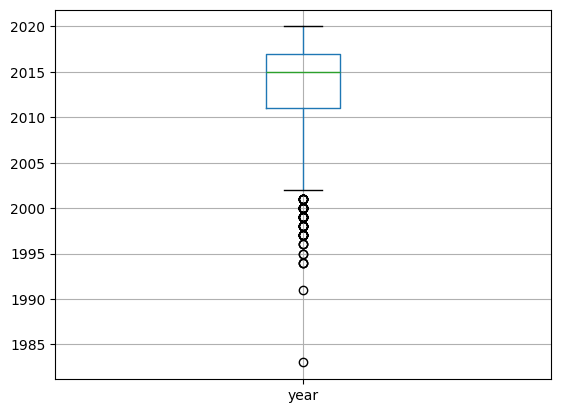

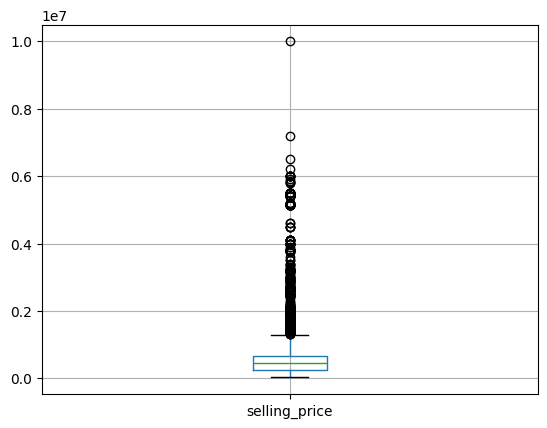

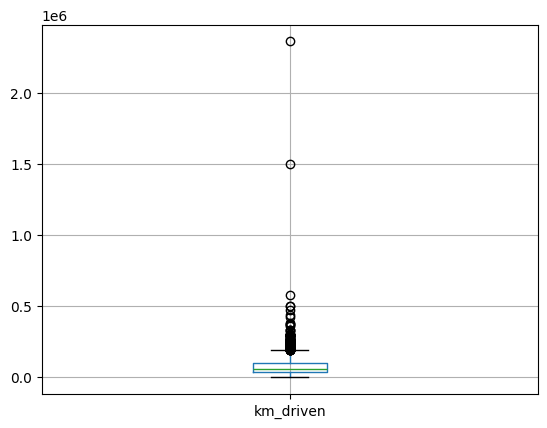

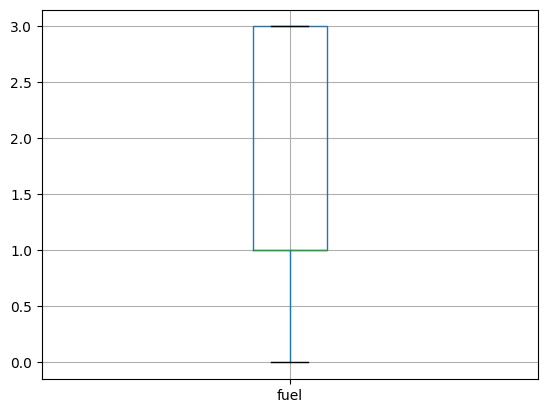

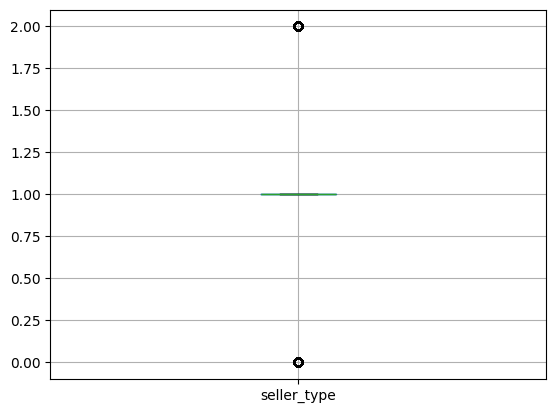

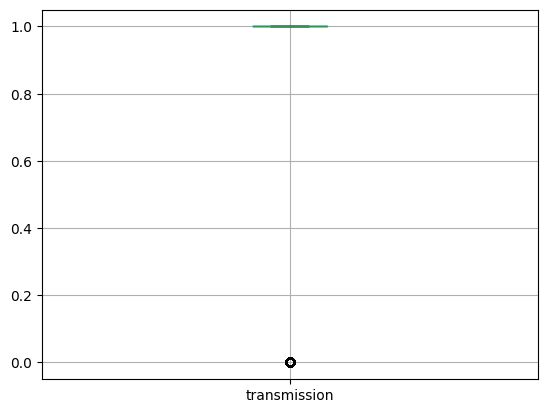

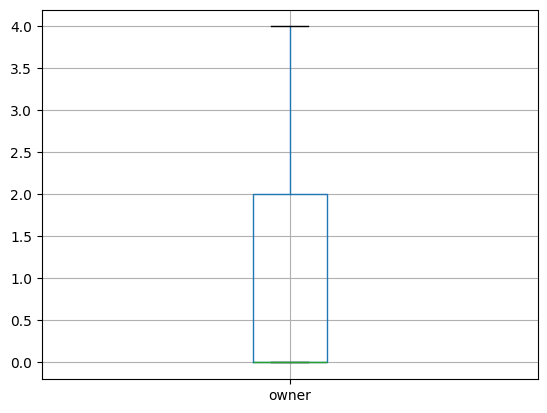

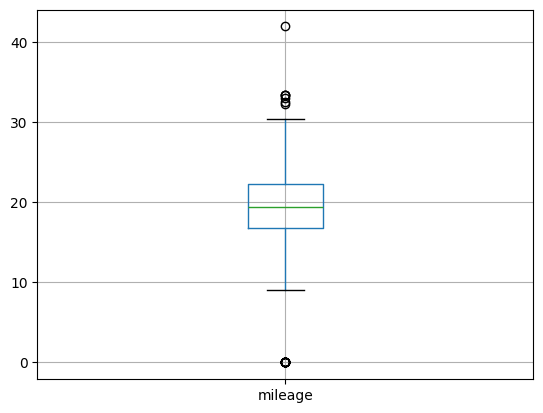

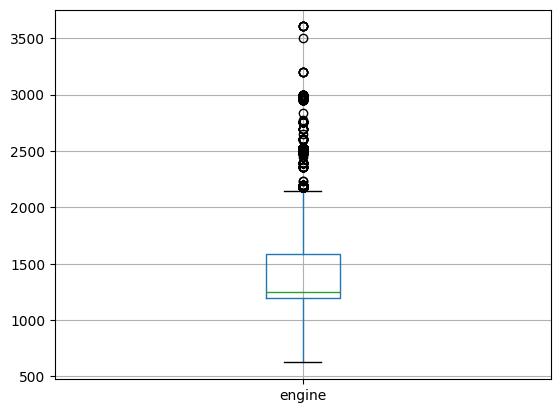

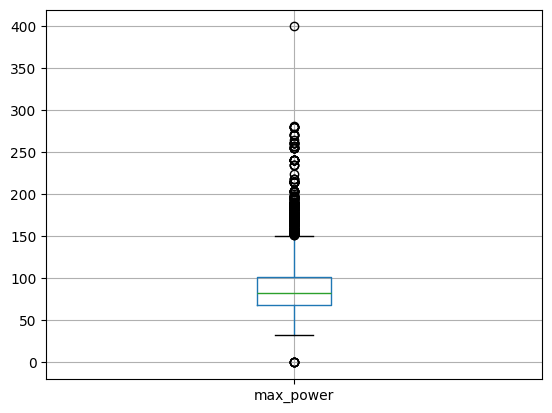

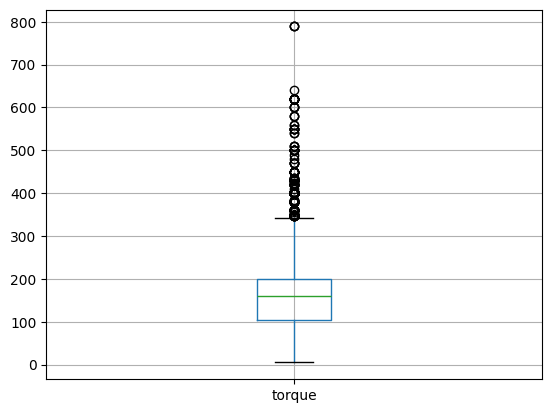

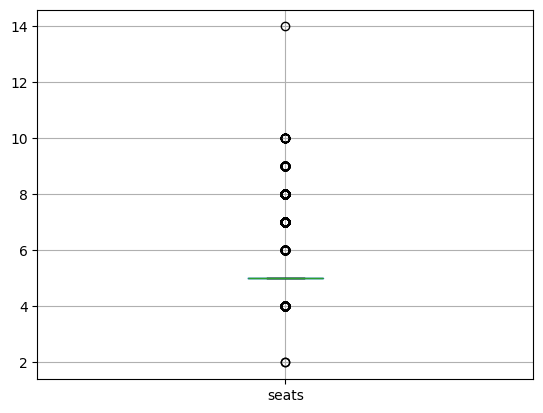

In [20]:

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [21]:
data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

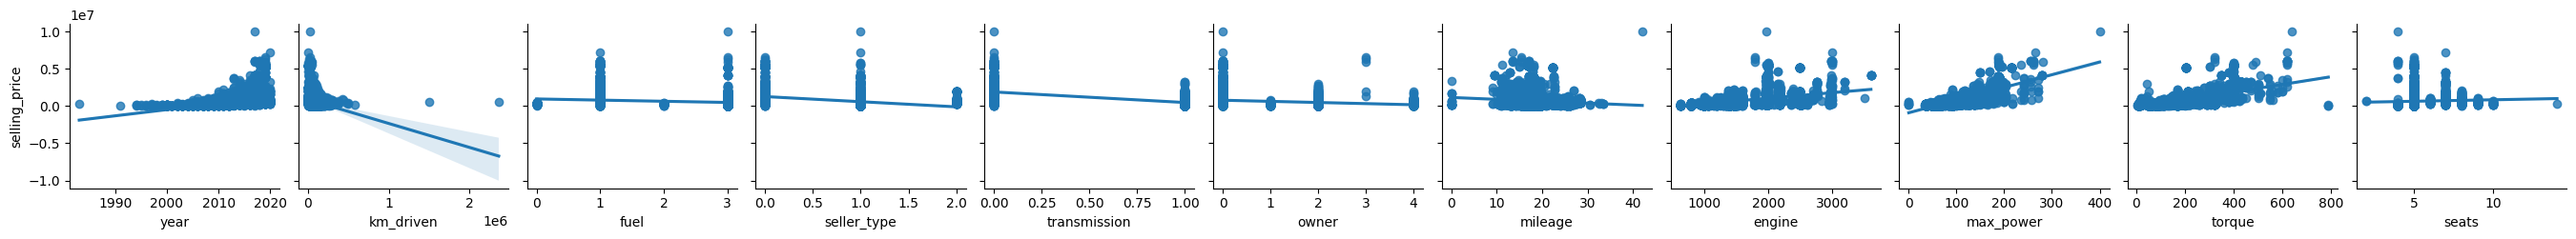

In [22]:
sns.pairplot(data,x_vars=[ 'year','km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
             y_vars=["selling_price"], kind="reg")  #kind = reg = regression line
plt.show()

 Name Mileage Engine shows close to no relation and we can drop the name col as the name of the person does not really matter for the selling price

In [24]:
X = data.loc[:,[ 'year','km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']]  #: = every in rows
Y = data.loc[:,"selling_price"]

In [25]:
X.shape

(8128, 11)

In [26]:
Y.shape

(8128,)

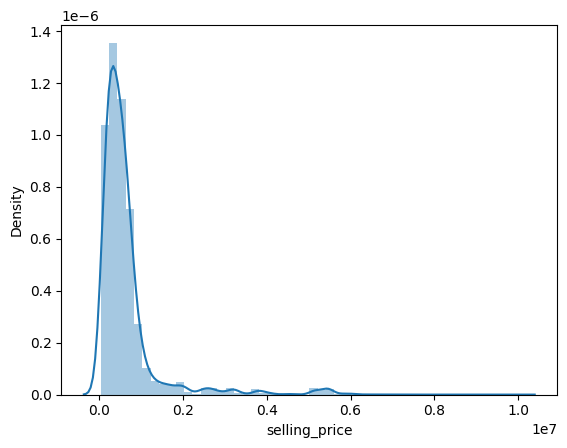

In [27]:
sns.distplot(Y)
plt.show()

In [28]:
Y_log= np.log(Y)
Y_log

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8128, dtype: float64

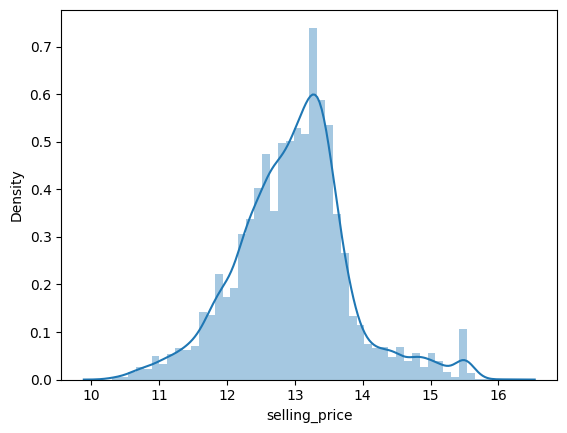

In [29]:
sns.distplot(Y_log)  #now we will use Y_log instead of Y cause it is close to normal distribution
plt.show()

                  year  km_driven      fuel  seller_type  transmission  \
year          1.000000  -0.418006 -0.050312    -0.146042     -0.244707   
km_driven    -0.418006   1.000000 -0.265877     0.122105      0.201229   
fuel         -0.050312  -0.265877  1.000000     0.110512     -0.035255   
seller_type  -0.146042   0.122105  0.110512     1.000000      0.227871   
transmission -0.244707   0.201229 -0.035255     0.227871      1.000000   
owner        -0.477249   0.280340 -0.022339     0.143443      0.147458   
mileage       0.310383  -0.171426 -0.081697    -0.019778      0.177809   
engine        0.017773   0.203954 -0.479019    -0.091254     -0.281620   
max_power     0.213282  -0.037714 -0.277107    -0.244764     -0.538186   
torque        0.272730  -0.003291 -0.580954    -0.240646     -0.373767   
seats         0.010222   0.219860 -0.337575     0.051546      0.069070   

                 owner   mileage    engine  max_power    torque     seats  
year         -0.477249  0.310383  0

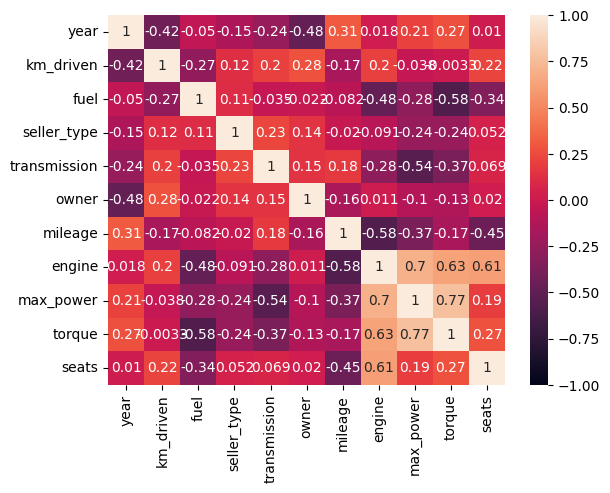

In [30]:
#assumption of no multicollinearity
#x should not be dependent on x
corr_df= X.corr(method="pearson") 
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)  
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df =pd.DataFrame()   
vif_df["features"]=X.columns 
vif_df["VIF FACTOR"]= [vif(X.values,i) for i in range(X.shape[1])] 
vif_df.round(2)

,features,VIF FACTOR
0,year,271.26
1,km_driven,3.28
2,fuel,12.20
3,seller_type,6.86
4,transmission,12.23
5,owner,1.68
6,mileage,56.40
7,engine,49.80
8,max_power,37.21
9,torque,16.39


In [32]:
#many columns show very high correlation but instead of dropping them all at once we will drop one and check the correlation once again
X.drop(["year",],axis=1,inplace=True) 

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df =pd.DataFrame()   #empty DF usme value add kreneg neeche
vif_df["features"]=X.columns  #new col banega as feature and usme values jaegi X.columns ki
vif_df["VIF FACTOR"]= [vif(X.values,i) for i in range(X.shape[1])]  #new col banega,vif backend me sab krega ,
vif_df.round(2)

,features,VIF FACTOR
0,km_driven,3.22
1,fuel,7.56
2,seller_type,6.80
3,transmission,11.52
4,owner,1.63
5,mileage,17.87
6,engine,46.11
7,max_power,35.85
8,torque,16.26
9,seats,54.42


In [34]:
X.drop(["engine",],axis=1,inplace=True)  #dropiing another col 

vif_df =pd.DataFrame()   
vif_df["features"]=X.columns  
vif_df["VIF FACTOR"]= [vif(X.values,i) for i in range(X.shape[1])]  
vif_df.round(2)

,features,VIF FACTOR
0,km_driven,3.17
1,fuel,6.82
2,seller_type,6.74
3,transmission,11.52
4,owner,1.62
5,mileage,15.39
6,max_power,23.23
7,torque,16.24
8,seats,27.87


There are still columns with high correlation as the limit is 5 for the VIF factor but i decided not to drop more columns as it would cause a large amount of data loss 

In [36]:
#Scalling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 


scaler.fit(X)  
X = scaler.transform(X)   

In [37]:
X

array([[ 1.33836255, -0.88911544,  0.27760719, ..., -0.49568159,
         0.22617537, -0.42725761],
       [ 0.88741086, -0.88911544,  0.27760719, ...,  0.33960716,
         0.85137626, -0.42725761],
       [ 1.24109846,  1.10639203,  0.27760719, ..., -0.38249884,
        -1.62129325, -0.42725761],
       ...,
       [ 0.88741086, -0.88911544,  0.27760719, ..., -0.49851116,
         0.22617537, -0.42725761],
       [-0.79260528, -0.88911544,  0.27760719, ..., -0.60886435,
        -0.29482537, -0.42725761],
       [-0.79260528, -0.88911544,  0.27760719, ..., -0.60886435,
        -0.29482537, -0.42725761]], shape=(8128, 9))

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y_log, test_size=0.2,random_state=10) # we used Y_log instead of Y

In [39]:
#1
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
#2.training
lm.fit(X_train,Y_train)

#3.
print(lm.intercept_)
print(lm.coef_)   

12.96994943065968
[-0.17708976 -0.06544314 -0.01660703 -0.12495018 -0.15781294  0.2077402
  0.48737597  0.05861813  0.1784898 ]


In [40]:
#predicting Y ie testing 
Y_pred=lm.predict(X_test)
print(Y_pred)

[12.00084664 12.9531833  13.58554127 ... 13.2955431  12.85210836
 11.50149363]


In [41]:
# getting a score for the training data
lm.score(X_train,Y_train)

0.7161154347977514

In [42]:
#Evaluating the model
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2= r2_score(Y_test,Y_pred)    
print("R-square:",r2)


rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:", rmse)

mse = mean_squared_error(Y_test,Y_pred)
print("MSE:", mse)


adjusted_r_sq = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("adj R-sq::",adjusted_r_sq)

R-square: 0.6606201781713581
RMSE: 0.4928413956927816
MSE: 0.24289264130840893
adj R-sq:: 0.6602439255972687


We got a very low R-square lets try to tune the model

In [44]:
#ridge
from sklearn.linear_model import Ridge 

rid = Ridge()
rid.fit(X_train,Y_train)

#print intercept and coef_ new one
print(rid.intercept_)
print(rid.coef_)

12.969949037598457
[-0.17705765 -0.06542521 -0.01661964 -0.12497582 -0.15781218  0.20760831
  0.48709846  0.0588188   0.17840367]


In [45]:
lm.score(X_train,Y_train)

0.7161154347977514

In [46]:
Y_pred= rid.predict(X_test)  # new pred as after punishment ie after ridge


In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

#calculating r square
r2= r2_score(Y_test,Y_pred)   
print("R-square:",r2)


rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:", rmse)

mse = mean_squared_error(Y_test,Y_pred)
print("MSE:", mse)


adjusted_r_sq = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("adj R-sq::",adjusted_r_sq)

R-square: 0.660650133603456
RMSE: 0.4928196448375458
MSE: 0.2428712023378048
adj R-sq:: 0.6602739142393801


No Improvements

In [49]:
#lasso


from sklearn.linear_model import Lasso
las= Lasso()

#intercept and coef
las.fit(X_train,Y_train)

print(las.intercept_)
print(las.coef_)

12.969249714349264
[-0. -0. -0. -0. -0. -0.  0.  0.  0.]


In [50]:
Y_pred= las.predict(X_test) 

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

#calculating r square
r2= r2_score(Y_test,Y_pred)   
print("R-square:",r2)


adjusted_r_sq = 1- (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("adj R-sq::",adjusted_r_sq)   #failure

R-square: -0.0006038527654050885
adj R-sq:: -0.001713169675344517


## ✅ Regression Model Summary

The linear regression model produced a very low R² and adjusted R² value of approximately 0.66, indicating poor predictive performance. This low accuracy is mainly due to the violation of key linear regression assumptions. Several independent variables showed high correlation, leading to severe multicollinearity in the dataset. In addition, the presence of significant outliers in the input features further affected the model’s stability. Even after applying Ridge and Lasso regression, the model performance remained low, indicating the need for more advanced non-linear models, so i decided to go ahead with Decision Tree 

In [52]:
#building a decesion tree from scratch 
X = data.loc[:,[ 'year','km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']]  #: = every in rows
Y = data.loc[:,"selling_price"]

In [53]:
#not scalling the data as tree based models dont require scalling 

In [54]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)  

In [55]:
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,190.0,5.0
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,250.0,5.0
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,12.7,5.0
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,22.4,5.0
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,11.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,0,18.50,1197.0,82.85,113.7,5.0
8124,2007,119000,1,1,1,1,16.80,1493.0,110.00,24.0,5.0
8125,2009,120000,1,1,1,0,19.30,1248.0,73.90,190.0,5.0
8126,2013,25000,1,1,1,0,23.57,1396.0,70.00,140.0,5.0


In [56]:
#predicting using the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(criterion="squared_error",random_state=10)
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values

Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[ 45000. 500000. 677500. ... 434999. 483000.  65000.]


In [57]:
model_DecisionTree.score(X_train, Y_train)  #checking the accuracy of the training data

0.9996568130867273

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9108991885487913
RMSE: 255518.64678208105
Adj R-square: 0.9107784259901462


Better R-square then Linear regression but still lets try to improve it more

In [60]:
#pruining
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(min_samples_leaf=4,
                                         random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)


from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

[ 80833.33333333 591000.         626000.         ... 506249.75
 400600.          59500.        ]
R-squared: 0.9064761090279975
RMSE: 261783.9718536947
Adj R-square: 0.9063493516597505


In [61]:
model_DecisionTree.score(X_train, Y_train)

0.9831868787849427

In [62]:
print(list(zip(data.columns[1:],model_DecisionTree.feature_importances_))) 

[('selling_price', np.float64(0.19402101523096116)), ('km_driven', np.float64(0.004379909882522511)), ('fuel', np.float64(0.0030510499057911943)), ('seller_type', np.float64(0.00012277195411238654)), ('transmission', np.float64(0.0006275040426774977)), ('owner', np.float64(0.0007105273626162846)), ('mileage', np.float64(0.012409626104358825)), ('engine', np.float64(0.01595026804521297)), ('max_power', np.float64(0.7472270579418022)), ('torque', np.float64(0.01617672603952538)), ('seats', np.float64(0.005323543490419559))]


Pruning made it a little worse but lets try Random Forest

In [64]:
#predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_RF=RandomForestRegressor(n_estimators=100,random_state=10)
model_RF.fit(X_train,Y_train)

#fit the model on the data and predict the values

Y_pred1=model_RF.predict(X_test)
print(Y_pred1)

[ 83510.         593949.99       708296.31733333 ... 445249.93
 447109.99        66455.        ]


In [65]:
Score = model_RF.score(X_train, Y_train)
print("Score: ",Score)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred1)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred1))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Score:  0.9960689931759799
R-squared: 0.9485268730316362
RMSE: 194210.2043833978
Adj R-square: 0.9484571090596485


##### Up until now Random forest gave us the most accurate prediction and we have stored the prediction in Y_pred1 variable

In [67]:
#lets try some other models
#using the KNeighbors_Regressor


from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(Y_train))), metric='euclidean')

#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [68]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5444875131592538
RMSE: 577739.3021609586
Adj R-square: 0.5438701354663942


### SUMMARY✅

Linear Regression performed the worst with an R² score of 66%, mainly due to the violation of regression assumptions and data complexity. To improve performance, a Decision Tree model was built from scratch, which achieved a strong R² score of 91%. After applying pruning, the model slightly dropped to 90%, indicating minor underfitting. The Random Forest model delivered the best performance with the highest R² and adjusted R² score of 94%, making it the most accurate model in this study. Additionally, the K-Nearest Neighbors (KNN) model achieved a respectable R² score of 84%, but still lagged behind ensemble methods. Overall, Random Forest emerged as the best-performing model for car price prediction.

### Deployment of the model

In [72]:
import pickle

# Save the trained Random Forest model
pickle.dump(model_RF, open("model_rf.pkl", "wb"))
